K-MEANS CLUSTERING
- In this implementation:

X is the input data.
k is the number of clusters.
max_iters is the maximum number of iterations (optional).
The function iteratively assigns data points to the nearest centroid and updates the centroids based on the mean of the assigned points. The process repeats until convergence or the maximum number of iterations is reached.

Note: This is a basic implementation and may not be suitable for large datasets. More sophisticated versions, such as those handling optimizations and optimizations for initialization, may be used in practice.

In [100]:
import numpy as np

def k_means(X, k, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid and update centroids iteratively
        #the inner part np.linalg.norm is to calc the euclidian distances
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update centroids based on the mean of assigned points
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Sort the centroids and labels based on cluster index
    sorted_indices = np.argsort(labels)
    sorted_labels = labels[sorted_indices]
    sorted_X = X[sorted_indices]

    # Create a dictionary with cluster indices as keys and arrays of points as values
    cluster_dict = {cluster_index: sorted_X[sorted_labels == cluster_index] for cluster_index in range(k)}

    return centroids, cluster_dict

# Example usage:
# Replace X_data and k_value with your own data and desired number of clusters (k)
X_data = np.array([[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]])
k_value = 4

# Perform k-means clustering
centroids, cluster_result = k_means(X_data, k_value)

# Display the results
print("Final Centroids:\n", centroids)

for cluster_index, points in cluster_result.items():
    print(f"\nCluster {cluster_index + 1}:\n{points}")




Final Centroids:
 [[-43.8          5.4       ]
 [-22.         -12.        ]
 [ 18.33333333  19.83333333]
 [-12.83333333  -9.5       ]]

Cluster 1:
[[-34  -1]
 [-49  15]
 [-46   5]
 [-49   0]
 [-41   8]]

Cluster 2:
[[-19 -11]
 [-25  -9]
 [-22 -16]]

Cluster 3:
[[13 13]
 [20 23]
 [21 27]
 [26 13]
 [11 15]
 [19 28]]

Cluster 4:
[[-11  -6]
 [-14  -5]
 [-12  -8]
 [ -9 -16]
 [-13 -19]
 [-18  -3]]


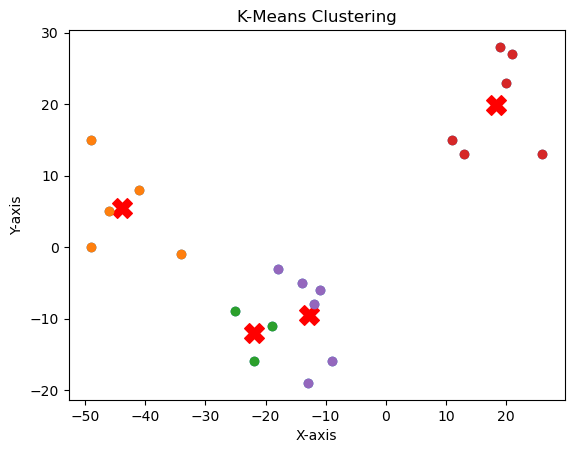

In [102]:
import matplotlib.pyplot as plt
# Plotting the data points, centroids, and clusters
plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Final Centroids')

for cluster_index, points in cluster_result.items():
    plt.scatter(points[:, 0], points[:, 1], marker='o', label=f'Cluster {cluster_index + 1}')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
#plt.legend()

# Show the plot
plt.show()

REAL DATA APPLICATIONS

In [87]:

# using loadtxt()
Data = np.loadtxt("Mall_Customers.csv",
                 delimiter=",", dtype=str)

display(Data)
print(Data.ndim)
print(Data.shape)
print(Data.size)

array([['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       ['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ...,
       ['0198', 'Male', '32', '126', '74'],
       ['0199', 'Male', '32', '137', '18'],
       ['0200', 'Male', '30', '137', '83']], dtype='<U22')

2
(201, 5)
1005


In [90]:
X_shape = Data.shape[0]
X_shape

201

In [71]:
#Process Data
X = np.delete(Data, 0, axis=0)
#shuffled_data = np.random.permutation(Data_without_first_row)

In [72]:
#Getting features from dataset select column number
X=X[:,[3,4]]
X_processed = X.astype(np.float_)
#X_processed

In [73]:
# Perform k-means clustering
k_value = 5
centroids, cluster_labels = k_means(X_processed, k_value)

# Display the results
print("Final Centroids:", centroids)
print("Cluster Labels:", cluster_labels)

Final Centroids: [[86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]
Cluster Labels: {0: array([[137.,  83.],
       [ 78.,  88.],
       [ 87.,  92.],
       [ 87.,  75.],
       [ 74.,  72.],
       [ 87.,  63.],
       [ 86.,  95.],
       [ 75.,  93.],
       [ 85.,  75.],
       [ 88.,  86.],
       [ 76.,  87.],
       [ 69.,  91.],
       [ 79.,  83.],
       [ 78.,  73.],
       [ 77.,  97.],
       [ 78.,  78.],
       [ 78.,  89.],
       [ 77.,  74.],
       [ 78.,  76.],
       [ 81.,  93.],
       [ 88.,  69.],
       [ 73.,  73.],
       [103.,  85.],
       [126.,  74.],
       [120.,  79.],
       [ 70.,  77.],
       [113.,  91.],
       [ 71.,  95.],
       [103.,  69.],
       [ 73.,  88.],
       [ 71.,  75.],
       [101.,  68.],
       [ 78.,  90.],
       [ 99.,  97.],
       [ 71.,  75.],
       [ 98.,  88.],
       [ 72.,  71.],
       [ 97.,  86.],
       [ 93.,  90.]]), 1: arr

Enhance our k-means by using WCSS where can find optimum of clusters use elbow method

K-Means is a popular clustering algorithm used in unsupervised machine learning. Its main objective is to partition a dataset into distinct, non-overlapping groups or clusters. Each data point belongs to the cluster with the nearest mean, and the algorithm iteratively refines these clusters. Here's an explanation of how K-Means works:

### Basic Steps of K-Means:

1. **Initialization:**
   - Choose the number of clusters (\(k\)) that you want to create in the dataset.
   - Randomly initialize \(k\) centroids, where each centroid represents the center of one cluster.

2. **Assign Points to Clusters:**
   - For each data point in the dataset, calculate the distance to each centroid.
   - Assign the data point to the cluster whose centroid is the closest (usually based on Euclidean distance).

3. **Update Centroids:**
   - Recalculate the centroids for each cluster by taking the mean of all data points assigned to that cluster.
   - The new centroid becomes the center of mass for the data points in the cluster.

4. **Repeat:**
   - Steps 2 and 3 are repeated iteratively until convergence.
   - Convergence occurs when the assignments of data points to clusters no longer change significantly or when a specified number of iterations is reached.

### Key Concepts:

1. **Centroids:**
   - Centroids are the representative points for each cluster.
   - They are initially placed randomly and are updated iteratively during the algorithm's execution.

2. **Cluster Assignment:**
   - Data points are assigned to the cluster whose centroid is closest in terms of distance (typically Euclidean distance, but other distance metrics can be used).

3. **Optimization Objective:**
   - K-Means aims to minimize the sum of squared distances (squared Euclidean distances) between data points and their assigned cluster centroids.
   - This objective is often referred to as the "inertia" or "within-cluster sum of squares."

4. **Number of Clusters (\(k\)):**
   - The number of clusters (\(k\)) needs to be specified before running the algorithm.
   - Choosing an appropriate \(k\) can impact the quality of the clustering.

### Use Cases:

- **Customer Segmentation:**
  - Grouping customers based on their purchasing behavior.

- **Image Compression:**
  - Reducing the number of colors in an image by clustering similar pixel values.

- **Anomaly Detection:**
  - Identifying unusual patterns or outliers in a dataset.

- **Document Classification:**
  - Grouping similar documents together.

### Challenges and Considerations:

- **Sensitivity to Initial Centroids:**
  - The choice of initial centroids can affect the final clustering result.

- **Choosing \(k\):**
  - Selecting the right number of clusters (\(k\)) can be challenging and may require domain knowledge or additional analysis.

- **Sensitive to Outliers:**
  - K-Means can be sensitive to outliers as it tries to minimize the sum of squared distances.

### Variants:

- **K-Means++:**
  - Improved initialization method to address sensitivity to initial centroids.

- **Mini-Batch K-Means:**
  - Uses a random subset (mini-batch) of data points for faster convergence.

- **Hierarchical K-Means:**
  - Creates a hierarchy of clusters rather than a flat partition.

K-Means is a simple yet effective algorithm widely used for clustering tasks. While it may not be suitable for all types of data distributions, it remains a popular choice for various applications due to its simplicity and efficiency.